# Анализ данных | Python 
## ОП «Журналистика», ОП «Медиакоммуникации» 2022/23

## Семинар 4 

## Генеральная совокупность и выборка. Частотные таблицы и распределения

*Из курса "Статистика для анализа данных"*

### Обсуждение самопроверки из ОК

1. Предположим, нам интересно, как студенты университета N относятся к онлайн-обучению. Как может выглядеть наша генеральная совокупность? Выберите один верный ответ. 

   `а) Студенты IT-направления университета N`
   
   `б) Преподаватели университета N`
   
   `в) Все студенты университета N`
   
   `г) Студенты магистратуры университета N`
 
2. Что не может представлять собой генеральную совокупность? Выберите один верный ответ.

    `а) Мужчины в возрастной группе 25-30 лет`
    
    `б) Россияне`
    
    `в) Школьники Москвы`
    
    `г) Нет верного ответа`
    
3. Предположим, что мы хотим узнать отношение пациентов к качеству обслуживания в поликлинике №0193 города N. Укажите, верно ли следующее утверждение: *для репрезентативной выборки нам достаточно в понедельник опросить посетителей указанного медучреждения*.

4. Ученики 10Б класса написали контрольную, за которую могли получить оценку 2, 3, 4 или 5. По их оценкам была построена частотная таблица. Укажите, какие ошибки были допущены в таблице. Считаем, что в классе учится 24 человек, все они писали работу. Выберите один верный ответ.

| Оценка 2 | Оценка 3 | Оценка 4 | Оценка 5 |
| -----:| -----:| -----:|-----:|
| 1 чел. | 4 | 6 | 13 |

   `а) Шапка таблицы расположена горизонтально, а не вертикально`
   
   `б) Нужно учитывать только отличные оценки`
   
   `в) Неверно указано количество пятерок, оно должно быть записано так: 13 чел.`
   
   `г) Неверно указано количество двоек, оно должно быть записано так: 1`
   
5. Предположим, у нас есть информация о ВВП страны N за 10 лет. Укажите, верно ли следующее утверждение: *эти данные можно представить в виде линейного графика, где по оси Х располагаются года, а по оси Y — значение ВВП*.
   

### Обсуждение теста из ОК

In [2]:
import pandas as pd # импортировали библиотеку pandas и назвали ее pd 

Описание данных

+ `name` — оригинальное имя персонажа вселенной Marvel
+ `align` — принадлежность персонажа к доброй/злой/нейтральной стороне
+ `eye` — описание глаз персонажа
+ `hair` — описание волос персонажа
+ `sex` —  пол персонажа
+ `appearances` — количество появлений персонажа
+ `first_appearance` — год первого появления персонажа

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/MarvelComicCaracters.csv', sep = ';')
data.head()

,name,align,eye,hair,sex,appearances,first_appearance
0,Spider-Man (Peter Parker),Добрый персонаж,Карие глаза,Каштановые волосы,Мужской персонаж,4043.0,1962.0
1,Captain America (Steven Rogers),Добрый персонаж,Голубые глаза,Белые волосы,Мужской персонаж,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Нейтральный персонаж,Голубые глаза,Черные волосы,Мужской персонаж,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Добрый персонаж,Голубые глаза,Черные волосы,Мужской персонаж,2961.0,1963.0
4,Thor (Thor Odinson),Добрый персонаж,Голубые глаза,Русые волосы,Мужской персонаж,2258.0,1950.0


**1. Какой тип графика из перечисленных наиболее удобен для описания распределения переменной `appearances`?** 

<AxesSubplot:>

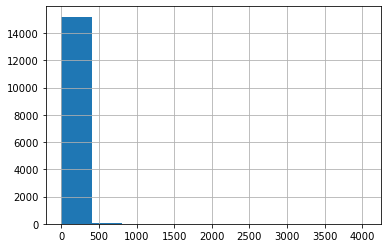

In [7]:
data['appearances'].hist()

Ой, почему такой график? Все потому, что большая часть значений лежит от 0 до 500, но есть и выбросы. Как работать с ними, обсудим чуть позже. Давайте пока оставим в нашей переменной только значения, не превышающие 50.

<AxesSubplot:>

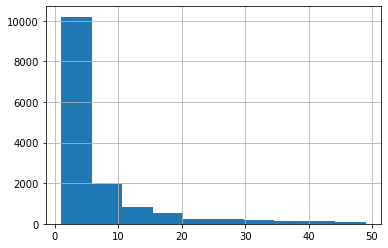

In [11]:
data[data['appearances'] < 50]['appearances'].hist()

**2. Укажите, верно ли следующее утверждение: *переменную `name` можно изобразить на интерпретируемом графике*.**

In [12]:
data['name'].value_counts() # будет ли график содержательным, если каждое имя встречается по разу?

Spider-Man (Peter Parker)                    1
Princess Pam (Earth-616)                     1
Mysto the Magician (Earth-616)               1
Nails Riggly (Earth-616)                     1
Napoleon Sack (Earth-616)                    1
                                            ..
Ancestor (Earth-616)                         1
Cissie Guthrie (Earth-616)                   1
Dark (Soldiers of Misfortune) (Earth-616)    1
Doctor Yesterday (Earth-616)                 1
Yologarch (Earth-616)                        1
Name: name, Length: 16376, dtype: int64

**3. По переменной `align` была построена частотная таблица. Укажите, какие ошибки были допущены в таблице. Чтобы проверить ее, постройте таблицу сами, используя удобную вам программу.**

| Добрый персонаж | Злой персонаж | Нйтральный персонаж | 
| -----:| -----:| -----:|
| 4636 | 6720 | 2 тыс. | 

In [15]:
data['align'].value_counts()

Злой персонаж           6720
Добрый персонаж         4636
Нейтральный персонаж    2208
Name: align, dtype: int64

**4. Определите три наиболее часто встречающих цвета глаз персонажей, выберите из данных только их и заполните частотную таблицу по переменной `eye`.**

In [17]:
data['eye'].value_counts()

Голубые глаза            1962
Темно-карие глаза        1924
Зеленые глаза             613
Черные глаза              555
Красные глаза             508
Белые глаза               400
Желтые глаза              256
Серые глаза                95
Карие глаза                76
Разноцветные глаза         49
Фиолетовые глаза           31
Оранжевые глаза            25
Розовые глаза              21
Один глаз                  21
Золотые глаза              14
Серебристые глаза          12
Лиловые глаза              11
Янтарные глаза             10
Много глаз                  7
Нет глаз                    7
Желтые глазные яблоки       6
Черные глазные яблоки       3
Пурпурные глаза             2
Фасеточные глаза            1
Name: eye, dtype: int64

**5. Укажите, верно ли следующее утверждение: *у мужских персонажей чаще всего встречаются темно-карие глаза*.**

In [18]:
data[data['sex'] == 'Мужской персонаж']['eye'].value_counts()

Темно-карие глаза        1400
Голубые глаза            1258
Черные глаза              394
Красные глаза             377
Зеленые глаза             328
Белые глаза               292
Желтые глаза              174
Серые глаза                75
Карие глаза                58
Разноцветные глаза         28
Один глаз                  20
Оранжевые глаза            18
Розовые глаза              15
Фиолетовые глаза           15
Золотые глаза              10
Янтарные глаза              8
Много глаз                  6
Серебристые глаза           4
Желтые глазные яблоки       4
Нет глаз                    3
Лиловые глаза               3
Черные глазные яблоки       1
Фасеточные глаза            1
Name: eye, dtype: int64

**6. Постройте частотную таблицу для персонажей женского пола по переменной `eye`. У скольких из них золотые глаза?**

In [21]:
data[data['sex'] == 'Женский персонаж']['eye'].value_counts()['Золотые глаза']

3

**7.Сколько раз появлялся добрый персонаж с пурпурными глазами?**

In [24]:
data[(data['align'] == 'Добрый персонаж') & (data['eye'] == 'Пурпурные глаза')]['appearances']

1729    21.0
Name: appearances, dtype: float64

**8.Были выбраны самые часто встречающиеся цвета глаз персонажей. Далее, только по этим данным, построена столбчатая диаграмма. Что можно сказать, основываясь только на графике?**

![](https://github.com/aaparshina/FCI_22-23_data_analysis/blob/main/data/pics/W_02.png?raw=true)

    а) Добрых персонажей любят больше, чем остальных
    
    б) Красные глаза чаще всего встречаются у злых персонажей
    
    в) Добрых персонажей больше, чем злых
    
    г) Голубые глаза свойственны добрым персонажам, поэтому встречаются чаще

**9. Укажите, верно ли следующее утверждение: *больше всего персонажей в первый раз появилось в 1993 году***.

In [26]:
data['first_appearance'].value_counts()

1993.0    554
1994.0    485
1992.0    455
2006.0    381
2008.0    360
         ... 
1952.0     26
1956.0     16
1957.0      7
1959.0      4
1958.0      2
Name: first_appearance, Length: 75, dtype: int64

**10.Сколько процентов (от общего числа персонажей) составляют мужские персонажи, которые появлялись больше 100 раз? В ответ запишите число (процент от 0 до 100), округлите до целого.**

In [27]:
data[(data['sex'] == 'Мужской персонаж') & (data['appearances'] > 100)].shape[0]

277

In [28]:
data.shape[0]

16376

In [29]:
round(277/16376 * 100)

2